# Задание 03

### 1. Связь AUC-ROC  и доли верных ответов (2 балла)
Пусть дана некоторая выборка $X$ и классификатор $b(x)$, возвращающий в качестве оценки принадлежности объекта $x$ к положительному классу 0 или 1 (а не вероятности). 

1) Постройте ROC-кривую для классификатора $b(x)$ на выборке $X$.

2) Покажите, что AUC-ROC классификатора $b(x)$ может быть выражена через долю правильных ответов и полноту классификатора $a(x;t)$, получающегося при выборе некоторого порога $t \in (0;1)$ ($a(x)=[b(x)>1]$). Помимо указанных величин в формулу могут входить $N,N_+,N_-$, число объектов, число положительных и отрицательных объектов в выборке $X$ соответсвенно. 


### 2. ROC, PR кривые  (2 балла)
Алгоритм  бинарной классификации выдает оценки вероятности принадлежности к положительному классу  $b_i=\hat{\mathcal{ P}}(y_i=+|x_i)$. Всего есть $N=10 000$ наблюдений. Если ранжировать их по возрастанию $b_i$, то окажется, что наблюдения с $y_i=1$ и наблюдения с $y_i=0$ образуют чередующиеся блоки различного размера:
$$
\underbrace{-------}_{3N/8}\underbrace{+++++++}_{3N/8}\underbrace{-------}_{N/8}\underbrace{+++++++}_{N/8}
$$
Постройте $ROC$ и $PR$ кривые, определите площади под кривыми. 

### Задание 2

Text(0, 0.5, 'TPR')

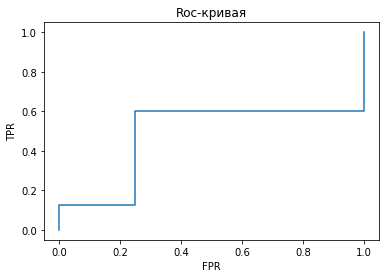

In [4]:
import matplotlib.pyplot as plt
#Построение Roc-кривой
N = 10000
FPR = [0,0,1/4,1/4,1,1]
TPR = [0,1/8,1/8, 3/5,3/5,1]
plt.plot(FPR, TPR)
plt.title('Roc-кривая')
plt.xlabel('FPR',fontsize=10)
plt.ylabel('TPR',fontsize=10)


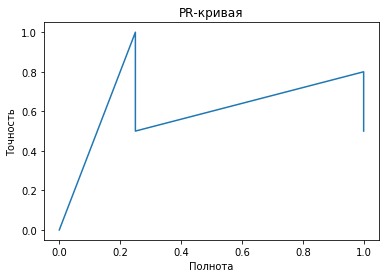

In [3]:
plt.title('PR-кривая')
plt.xlabel('Полнота',fontsize=10)
plt.ylabel('Точность',fontsize=10)
precision = [0,1,1/2,4/5, 1/2]
recall = [0,1/4,1/4,1, 1]
plt.plot(recall,precision)


### 3. Логистическая регрессия на данных (6 баллов )

In [6]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

from sklearn import metrics


### [Данные](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
Будем анализировать данные, связанные с прямыми маркетинговыми кампаниями (телефонными звонками) португальского банковского учреждения. Цель классификации - предсказать, будет ли клиент подписывать (1/0) срочный депозит (переменная y).



   #### bank client data:
   * 1 - age (numeric)
   * 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
      "blue-collar","self-employed","retired","technician","services") 
   * 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   * 4 - education (categorical: "unknown","secondary","primary","tertiary")
   * 5 - default: has credit in default? (binary: "yes","no")
   * 6 - balance: average yearly balance, in euros (numeric) 
   * 7 - housing: has housing loan? (binary: "yes","no")
   * 8 - loan: has personal loan? (binary: "yes","no")
   related with the last contact of the current campaign:
   * 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   * 10 - day: last contact day of the month (numeric)
   * 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   * 12 - duration: last contact duration, in seconds (numeric)
   other attributes:
   * 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   * 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
   * 15 - previous: number of contacts performed before this campaign and for this client (numeric)
   * 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  #### Output variable (target):
   * 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [7]:
data = pd.read_csv('bank.csv', sep=';',header=0)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB
None


#### 3.1. Какова доля положительных объектов в выборке?

In [9]:
#какого-то класса намного больше
a = data['y'].value_counts() # встречаемость каждого уникального элемента
print('доля положительных объектов в выборке: ',a['yes']/ (a['no']+a['yes'])*100,'%')

доля положительных объектов в выборке:  11.523999115239992 %


####  3. 2. Подготовка данных. 
1. Подготовьте матрицу объект-признак:
 * удалите (но не навсегда!) целевой признак ('y') 

 * удалите признак 'day' (можно навсегда) 

 * Все категориальные признаки преобразуйте в бинарные, используя [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html). 


2. Подготовьте целевой вектор: 
    
 * преобразуйте признак 'y' в вектор, состоящий из нулей (y='no') и единиц (y='yes').
 

In [10]:
#df = pd.get_dummies(data, columns=['job','marital','education','default','housing','loan','contact','poutcome'])
del data['day']

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = data.columns[data.dtypes == 'object'].union(['education'])
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])


In [12]:
X = data.iloc[:, :-1].values
y = data.iloc[:,-1].values
print(X.shape,y.shape)

(4521, 15) (4521,)


#### 3. 3. Логистическая регрессия.

* Разделите выборку в соотношении 70:30;

* Обучите логистическую регрессию с параметрами по умолчанию. 


In [13]:
np.random.seed(17)
lr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 3.4. Чему равны следующие метрики качества:

   * Доля верных предсказаний,
   * Точность,
   * Полнота,
   * F1-мера? 

In [17]:
print ('Доля верных предсказаний =', metrics.accuracy_score(y_test, y_pred))
print ('Точность =', metrics.precision_score(y_test, y_pred))
print ('Полнота =', metrics.recall_score(y_test, y_pred))
print ('F1-мера =', metrics.f1_score(y_test, y_pred))

Доля верных предсказаний = 0.899042004421518
Точность = 0.5227272727272727
Полнота = 0.16546762589928057
F1-мера = 0.25136612021857924


#### 3.5. Постройте ROC кривую и найдите площадь под кривой. 

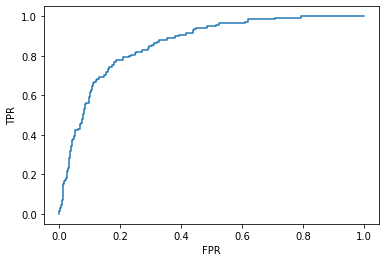

AUC-ROC= 0.8619921796552905


In [18]:
probs=lr.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
print('AUC-ROC=',metrics.auc(fpr, tpr))

#### 3.6. Порог $t$ в модели логистической регрессии по умолчанию $t=0.5$. 

$a(x) = \begin{cases}
        +1, \, b(x) \ge t,\\
        -1, \, b(x) < t.
        \end{cases}$ 
        
Измените порог на $t=0.2$. Как изменятся метрики качества для такого классификатора? 


In [19]:
lr = LogisticRegression(C=0.2)
lr = lr.fit(X, y)

y_pred = lr.predict(X)
print ('Accuracy =', metrics.accuracy_score(y, y_pred))

Accuracy = 0.8911745189117452


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 3.7. Постройте логистическую регрессию, штрафующую несбалансированные классы по-разному (пропорционально доли класса). Как изменились метрики качества классификатора? 

In [20]:
lr = LogisticRegression()

#### 3.8. Построите логистическую регрессию с L1-регуляризацией. С помощью GridSearchCV определите наилучший гиперпараметр С. 
Воспользуйтесь StratifiedKFold для кросс-валидации, при таком разбиении сохраняется соотношение классов в обучающей и тестовой выборках. 

In [21]:
lr = LogisticRegression()
alphas=np.logspace(-2,3,21)

param_grid = {'C': alphas}
optimizer = GridSearchCV(LogisticRegression('l1'), param_grid, cv = 3)
optimizer.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.0000000...1325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02, 1.77827941e+02, 3.16227766e+02, 5.62341325e+02,


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00...1325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02, 1.77827941e+02, 3.16227766e+02, 5.62341325e+02,


In [52]:
print(optimizer.best_params_)

{'C': 0.1778279410038923}


#### 3.9. Постройте зависимость средней ошибки классификатора (доля верных предсказаний) от значения параметра регуляризации. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

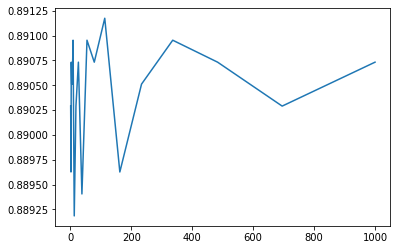

In [50]:
c = np.logspace(0, 3,20)
accuracy = []
for x in c:
    lr = LogisticRegression(C = x)
    lr = lr.fit(X, y)
    y_pred = lr.predict(X)
    accuracy.append(metrics.accuracy_score(y, y_pred))
plt.plot(c, accuracy)
